In [60]:
%pip install tensorflow pandas numpy scikit-learn matplotlib

In [61]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [62]:

# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [63]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("D:/Thái/Phân tích thống kê/Platinum_data_filtered.csv")

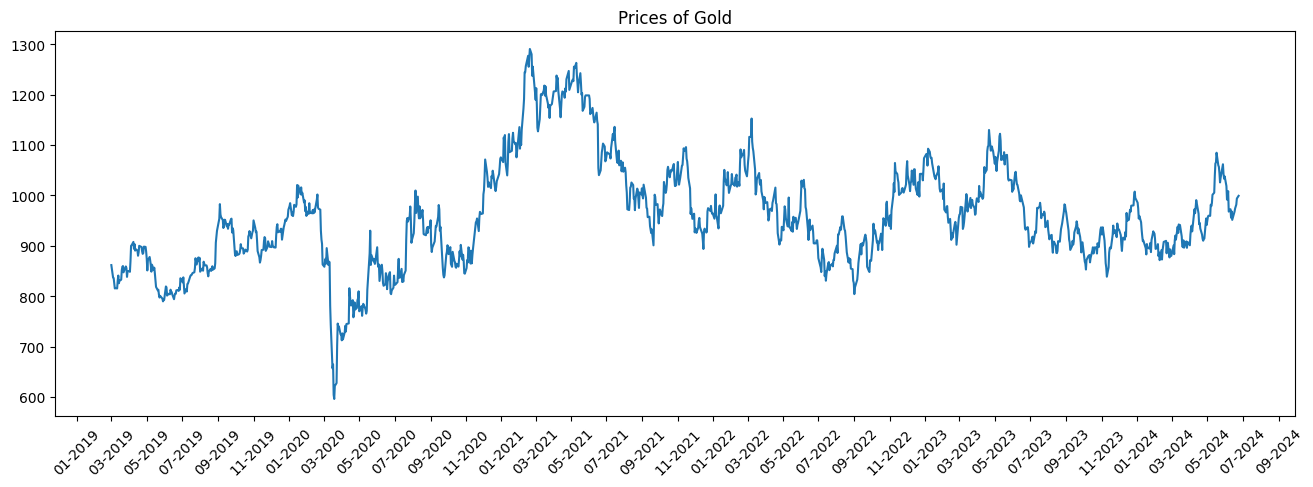

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.date,format='%m/%d/%Y')

# Flip the column
#df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'close' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Gold')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

Split dataset (7-2-1)

In [65]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [66]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [67]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [68]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.18475, saving model to save_model_7_2_1.keras
19/19 - 20s - 1s/step - loss: 0.1848
Epoch 2/80

Epoch 2: loss improved from 0.18475 to 0.06196, saving model to save_model_7_2_1.keras
19/19 - 1s - 27ms/step - loss: 0.0620
Epoch 3/80

Epoch 3: loss improved from 0.06196 to 0.03908, saving model to save_model_7_2_1.keras
19/19 - 0s - 24ms/step - loss: 0.0391
Epoch 4/80

Epoch 4: loss improved from 0.03908 to 0.03525, saving model to save_model_7_2_1.keras
19/19 - 0s - 26ms/step - loss: 0.0353
Epoch 5/80

Epoch 5: loss did not improve from 0.03525
19/19 - 0s - 18ms/step - loss: 0.0355
Epoch 6/80

Epoch 6: loss did not improve from 0.03525
19/19 - 0s - 17ms/step - loss: 0.0357
Epoch 7/80

Epoch 7: loss improved from 0.03525 to 0.03500, saving model to save_model_7_2_1.keras
19/19 - 0s - 26ms/step - loss: 0.0350
Epoch 8/80

Epoch 8: loss improved from 0.03500 to 0.03303, saving model to save_model_7_2_1.keras
19/19 - 1s - 29ms/step - loss: 0.03

In [69]:

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step


In [70]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [71]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [72]:
# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


In [73]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.535338995249748, 0.5444076579818626, 0.5552036850439039, 0.5726212753706637, 0.5803944148553333]


In [74]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5723172426223755], [0.5643340349197388], [0.557506263256073], [0.5521845817565918], [0.5474279522895813], [0.5425947308540344], [0.5376759171485901], [0.5327519774436951], [0.5278992056846619], [0.5231366157531738], [0.5184562802314758], [0.5138505101203918], [0.5093165040016174], [0.5048549771308899], [0.50046706199646], [0.49615350365638733], [0.49191442131996155], [0.4877498149871826], [0.483659565448761], [0.4796435832977295], [0.4757016897201538], [0.4718337953090668], [0.4680396020412445], [0.46431872248649597], [0.4606707692146301], [0.4570954144001007], [0.45359206199645996], [0.45016011595726013], [0.44679898023605347], [0.4435081481933594]]


In [75]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [76]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[993.48878845]
 [987.94285406]
 [983.19960108]
 [979.50262895]
 [976.19819846]
 [972.84055952]
 [969.42345964]
 [966.00279873]
 [962.63157819]
 [959.32300696]
 [956.07157788]
 [952.87194938]
 [949.72217533]
 [946.62275261]
 [943.57446797]
 [940.57783899]
 [937.63294849]
 [934.73979647]
 [931.89830012]
 [929.10839732]
 [926.36996385]
 [923.6829376 ]
 [921.04711154]
 [918.46221651]
 [915.92798337]
 [913.44418438]
 [911.01040547]
 [908.62623256]
 [906.29125157]
 [904.00511055]]


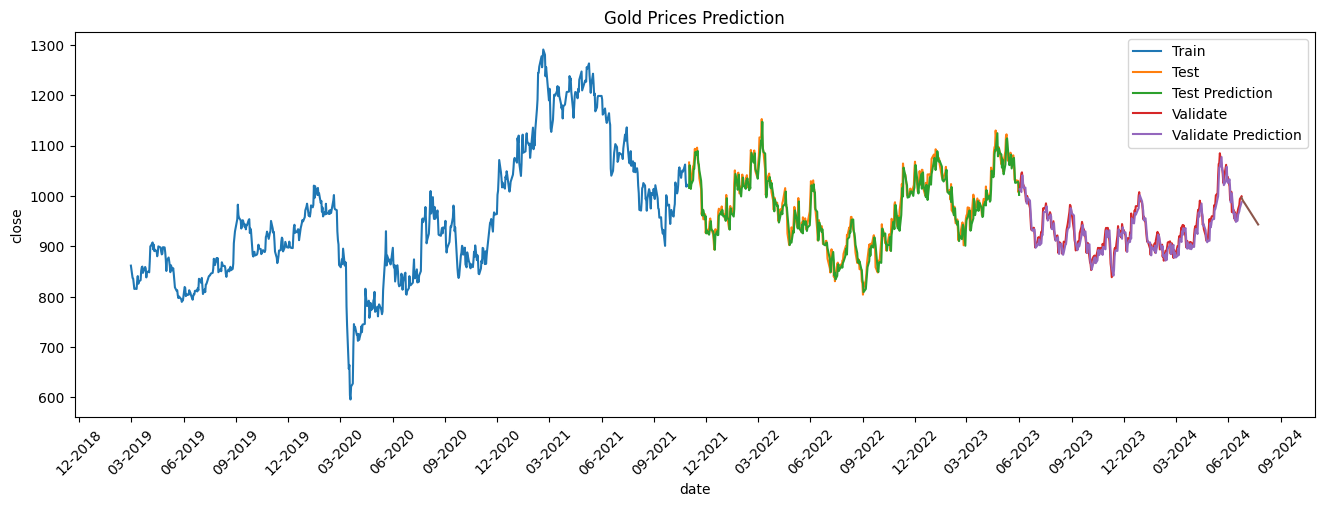

In [107]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

In [78]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.159448702830192
MAPE:  1.3511001673481615
RMSE:  16.686623875348342

** Validate **
MAE:  12.496679505305508
MAPE:  1.320303408709326
RMSE:  15.272612743076433


Split dataset (6-3-1)

In [79]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [80]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [81]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [82]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.21241, saving model to save_model_6_3_1.keras
16/16 - 17s - 1s/step - loss: 0.2124
Epoch 2/80

Epoch 2: loss improved from 0.21241 to 0.08016, saving model to save_model_6_3_1.keras
16/16 - 0s - 23ms/step - loss: 0.0802
Epoch 3/80

Epoch 3: loss improved from 0.08016 to 0.04978, saving model to save_model_6_3_1.keras
16/16 - 0s - 26ms/step - loss: 0.0498
Epoch 4/80

Epoch 4: loss improved from 0.04978 to 0.03601, saving model to save_model_6_3_1.keras
16/16 - 0s - 29ms/step - loss: 0.0360
Epoch 5/80

Epoch 5: loss improved from 0.03601 to 0.03464, saving model to save_model_6_3_1.keras
16/16 - 0s - 24ms/step - loss: 0.0346
Epoch 6/80

Epoch 6: loss did not improve from 0.03464
16/16 - 0s - 23ms/step - loss: 0.0374
Epoch 7/80

Epoch 7: loss did not improve from 0.03464
16/16 - 0s - 20ms/step - loss: 0.0361
Epoch 8/80

Epoch 8: loss did not improve from 0.03464
16/16 - 0s - 25ms/step - loss: 0.0368
Epoch 9/80

Epoch 9: loss improved from 0

In [83]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)
     

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [84]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [85]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [86]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [87]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.535338995249748, 0.5444076579818626, 0.5552036850439039, 0.5726212753706637, 0.5803944148553333]


In [88]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5611861348152161], [0.542718231678009], [0.5265732407569885], [0.5126057267189026], [0.4996076822280884], [0.48678889870643616], [0.47420886158943176], [0.4619714319705963], [0.45013535022735596], [0.43870168924331665], [0.4276527762413025], [0.41697579622268677], [0.40666231513023376], [0.3967052102088928], [0.3870968520641327], [0.37782880663871765], [0.3688925504684448], [0.36027926206588745], [0.35198014974594116], [0.34398627281188965], [0.33628880977630615], [0.32887890934944153], [0.3217476010322571], [0.3148861825466156], [0.30828601121902466], [0.30193841457366943], [0.29583504796028137], [0.2899676263332367], [0.28432801365852356], [0.27890828251838684]]


In [89]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[985.75600786]
 [972.92635555]
 [961.71043035]
 [952.00719835]
 [942.97745684]
 [934.07224793]
 [925.33289615]
 [916.83155379]
 [908.6090278 ]
 [900.66606352]
 [892.99038365]
 [885.57308564]
 [878.40831032]
 [871.49110953]
 [864.81618313]
 [858.37767197]
 [852.16965481]
 [846.18600336]
 [840.42061003]
 [834.86726372]
 [829.51983615]
 [824.37217833]
 [819.41805844]
 [814.65143102]
 [810.06629199]
 [805.6566166 ]
 [801.41660782]
 [797.34051001]
 [793.42267109]
 [789.65758387]]


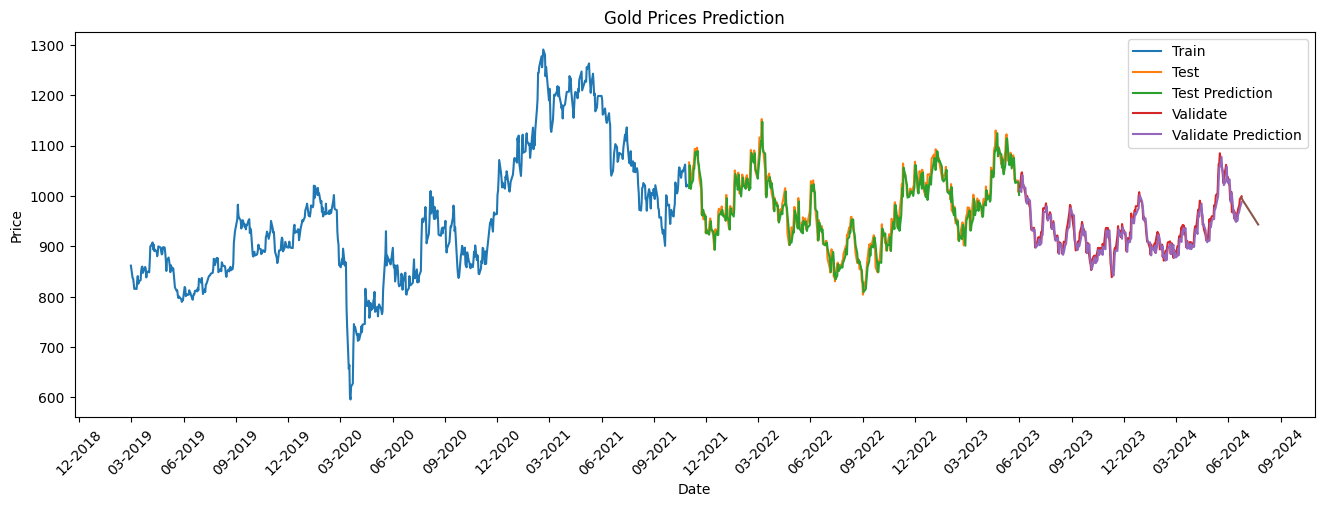

In [106]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)
  
plt.show()

In [91]:

evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.26277478088686
MAPE:  1.4962756392956718
RMSE:  17.9016166041973

** Validate **
MAE:  12.492291122092345
MAPE:  1.317010352465865
RMSE:  15.280268697701855


Split dataset (5-3-2)

In [92]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [93]:

# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [94]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [95]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.23104, saving model to save_model_5_3_2.keras
14/14 - 16s - 1s/step - loss: 0.2310
Epoch 2/80

Epoch 2: loss improved from 0.23104 to 0.08333, saving model to save_model_5_3_2.keras
14/14 - 0s - 29ms/step - loss: 0.0833
Epoch 3/80

Epoch 3: loss improved from 0.08333 to 0.05820, saving model to save_model_5_3_2.keras
14/14 - 0s - 27ms/step - loss: 0.0582
Epoch 4/80

Epoch 4: loss improved from 0.05820 to 0.03546, saving model to save_model_5_3_2.keras
14/14 - 0s - 25ms/step - loss: 0.0355
Epoch 5/80

Epoch 5: loss improved from 0.03546 to 0.03414, saving model to save_model_5_3_2.keras
14/14 - 0s - 25ms/step - loss: 0.0341
Epoch 6/80

Epoch 6: loss improved from 0.03414 to 0.03313, saving model to save_model_5_3_2.keras
14/14 - 0s - 32ms/step - loss: 0.0331
Epoch 7/80

Epoch 7: loss improved from 0.03313 to 0.03192, saving model to save_model_5_3_2.keras
14/14 - 0s - 31ms/step - loss: 0.0319
Epoch 8/80

Epoch 8: loss did not improve from

In [96]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


In [97]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [98]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values
  

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [99]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [100]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.535338995249748, 0.5444076579818626, 0.5552036850439039, 0.5726212753706637, 0.5803944148553333]


In [101]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.576614260673523], [0.5726245641708374], [0.5690202116966248], [0.5663079023361206], [0.5639324188232422], [0.5615206360816956], [0.559037983417511], [0.5565037131309509], [0.5539549589157104], [0.5514044165611267], [0.5488522052764893], [0.546296238899231], [0.5437354445457458], [0.5411699414253235], [0.5386005640029907], [0.5360279679298401], [0.5334526896476746], [0.5308755040168762], [0.528296709060669], [0.5257169008255005], [0.5231367349624634], [0.520556628704071], [0.5179772973060608], [0.5153992772102356], [0.5128229260444641], [0.5102488994598389], [0.5076777935028076], [0.5051100254058838], [0.5025461912155151], [0.49998679757118225]]


In [102]:

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[996.47392689]
 [993.70228473]
 [991.19834107]
 [989.31409975]
 [987.66385136]
 [985.98838589]
 [984.26368708]
 [982.50312951]
 [980.73250996]
 [978.96064819]
 [977.18762701]
 [975.41199716]
 [973.63301333]
 [971.85075831]
 [970.06581181]
 [968.27862932]
 [966.4895835 ]
 [964.69921264]
 [962.90772378]
 [961.115531  ]
 [959.32308978]
 [957.53068996]
 [955.73882844]
 [953.94787788]
 [952.15808672]
 [950.36991045]
 [948.58376315]
 [946.79993465]
 [945.01883904]
 [943.24082827]]


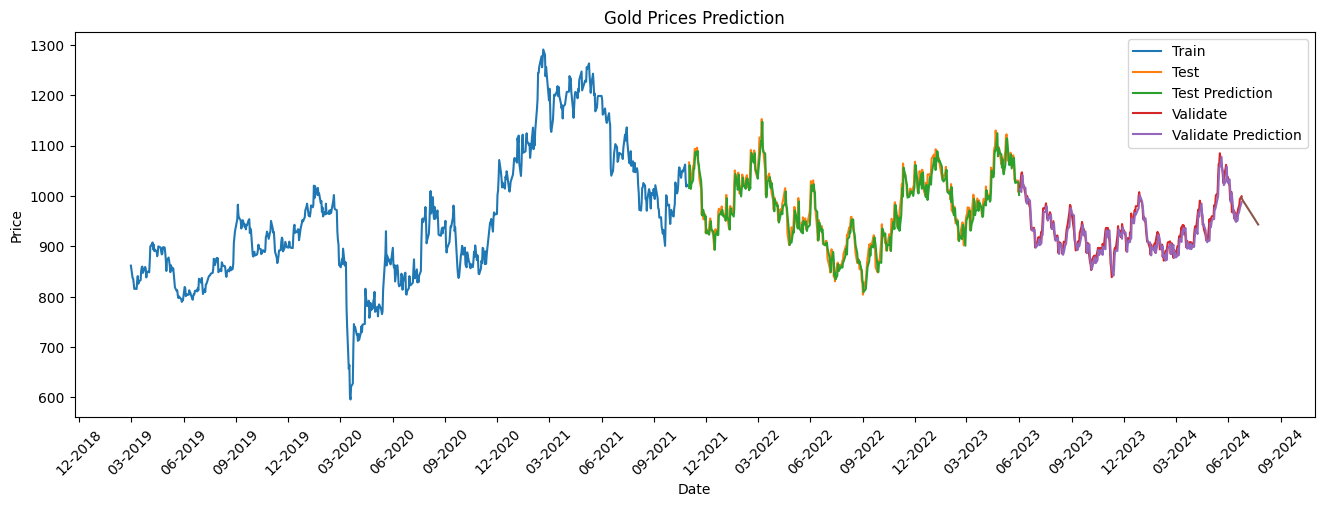

In [105]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

In [104]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.728652141321842
MAPE:  1.6021661585384182
RMSE:  20.004263353354155

** Validate **
MAE:  12.548343469146502
MAPE:  1.338867395952364
RMSE:  15.342570506477093
